## Importing Packages

In [1]:
from imutils import paths, contours
from skimage import io, measure
from PIL import Image as im, ImageEnhance, ImageOps, ImageFilter, ImageDraw, ImageChops
from scipy.ndimage import interpolation as inter
from matplotlib import pyplot as plt
import cv2 as cv
import sys
import numpy as np
import imutils
from numpy import asarray


## Loading Image Path

In [2]:
NSTrainPaths = list(paths.list_images("..\\Code\\naturalSceneDataset\\Braille\\images\\train"))

In [3]:
NSTrainPaths

['..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000000.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000001.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000002.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000003.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000004.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000006.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000007.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000008.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000009.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000010.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000011.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000012.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000013.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000014.jpg',
 '..\\

## Preprocessing

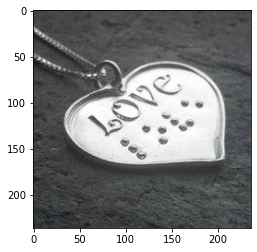

In [19]:
img = cv.imread(NSTrainPaths[2])
img
plt.imshow(img)
plt.show()

In [18]:
if(len(img.shape)<3):
      print ('gray')
elif len(img.shape)==3:
      print ('Color(RGB)')

Color(RGB)


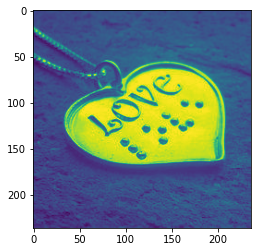

In [21]:
#convert to grayscale
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#contour
contours, hierarchy = cv.findContours(img, 
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
plt.imshow(img)
plt.show()


In [22]:
print("Number of Contours found = " + str(len(contours)))

Number of Contours found = 1


In [5]:
height, width = img.shape[:2]
print("The height of the image is: ", height)
print("The width of the image is: ", width)


The height of the image is:  236
The width of the image is:  236


In [6]:
img = cv.resize(img, (750, 750))
cv.imshow('Resized', img)
cv.waitKey(0)

-1

In [9]:
# Gaussian Blur
Gaussian = cv.GaussianBlur(img, (9, 9), 0)
cv.imshow('Gaussian Blurring', Gaussian)
cv.waitKey(0)


-1

In [20]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv.blur(gray, (3, 3))
  
# Apply Hough transform on the blurred image.
detected_circles = cv.HoughCircles(gray_blurred, 
                   cv.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 1, maxRadius = 40)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv.circle(img, (a, b), r, (0, 255, 0), 2)
  
        # Draw a small circle (of radius 1) to show the center.
        cv.circle(img, (a, b), 1, (0, 0, 255), 3)
cv.imshow("Detected Circle", img)
cv.waitKey(0)

-1